In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [120]:
happiness=pd.read_csv('happiness_score_dataset.csv')

In [121]:
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Preprocessing

In [122]:
# converting dataframe into only numerical data
happiness.drop(['Country','Region'],axis=1,inplace=True)

In [118]:
happiness

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [26]:
#finding null values
happiness.isna().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [27]:
# finding duplicate values
happiness.duplicated().sum()

0

In [28]:
happiness.info

<bound method DataFrame.info of      Happiness Rank  Happiness Score  Standard Error  \
0                 1            7.587         0.03411   
1                 2            7.561         0.04884   
2                 3            7.527         0.03328   
3                 4            7.522         0.03880   
4                 5            7.427         0.03553   
..              ...              ...             ...   
153             154            3.465         0.03464   
154             155            3.340         0.03656   
155             156            3.006         0.05015   
156             157            2.905         0.08658   
157             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464

In [29]:
happiness.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [30]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Correlation

In [31]:
happiness.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Figure size 800x700 with 0 Axes>

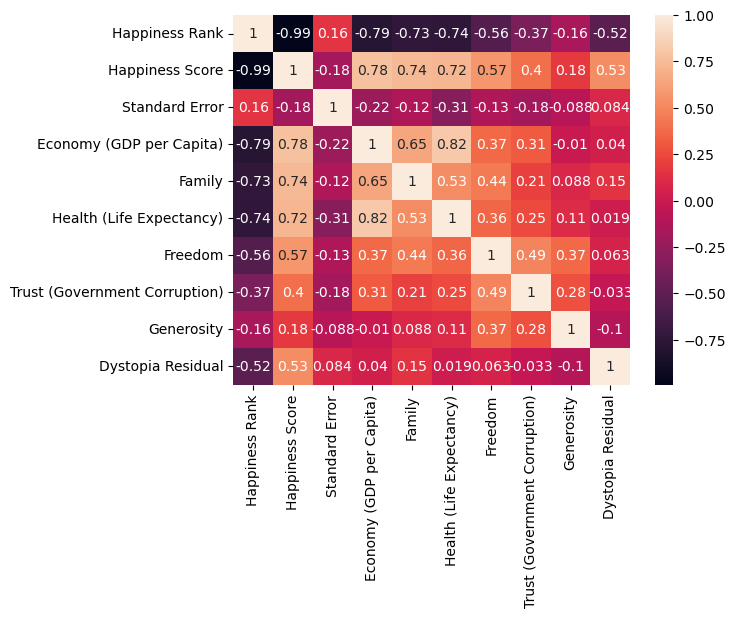

<Figure size 800x700 with 0 Axes>

In [32]:
corr_hmap = happiness.corr()
sns.heatmap(corr_hmap,annot=True)
plt.figure(figsize=(8,7))

Freedom and trust is positively correlated
Economy and Family is positively correlated
Happiness Score and standard Error is negatively correlated


# Data Visualization

# Joint plot

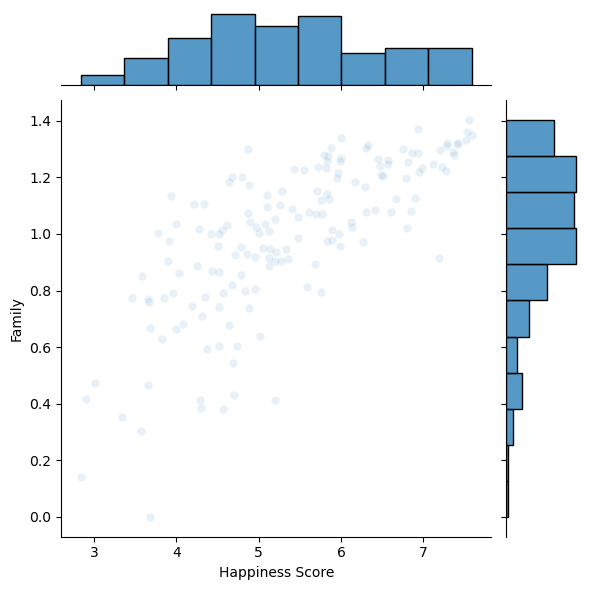

In [39]:
from scipy.stats import pearsonr
sns.jointplot(x='Happiness Score', y='Family', data=happiness, alpha = 0.1)

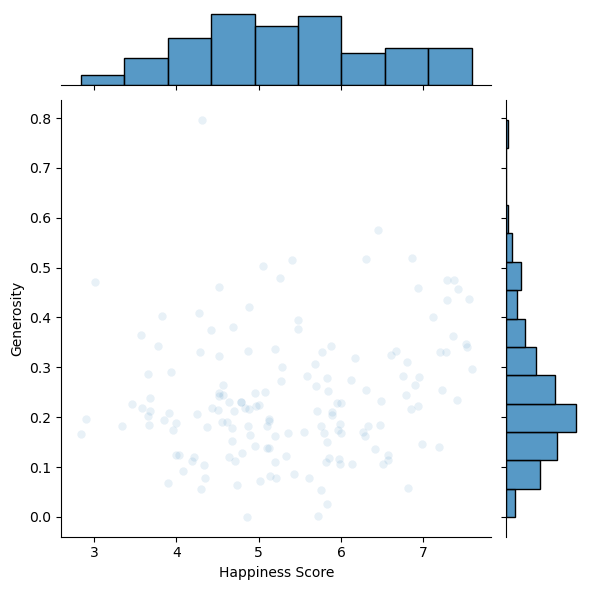

In [40]:
sns.jointplot(x='Happiness Score', y='Generosity', data=happiness, alpha = 0.1)

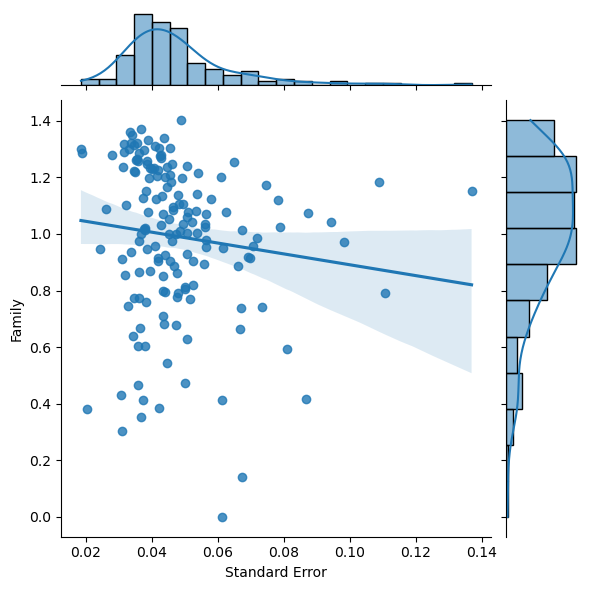

In [41]:
sns.jointplot(x='Standard Error', y='Family', data=happiness, kind='reg')

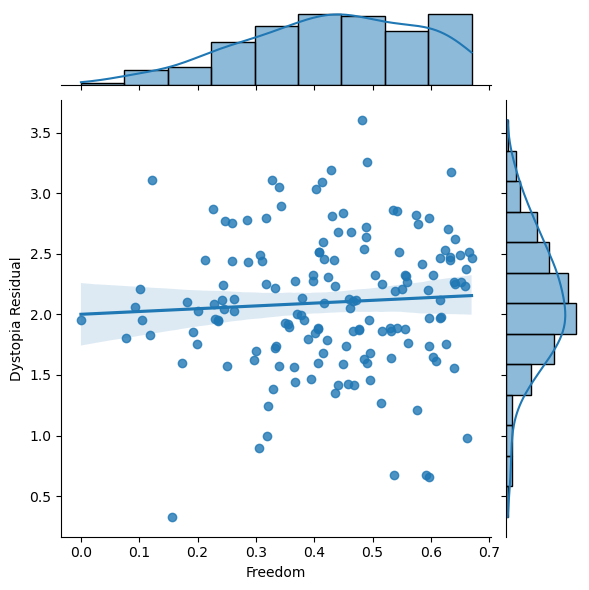

In [44]:
sns.jointplot(x='Freedom', y='Dystopia Residual', data=happiness, kind='reg')

# KDE Plot

<Axes: xlabel='Family', ylabel='Density'>

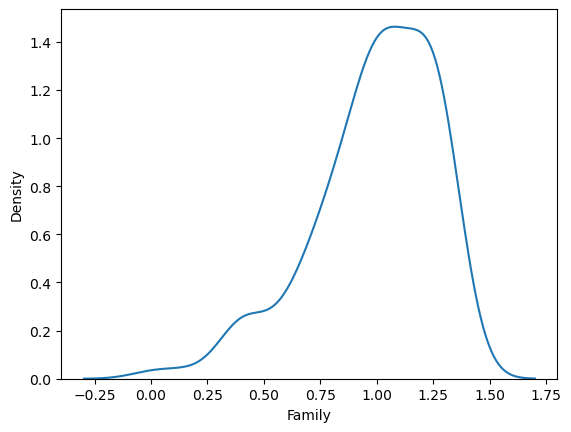

In [59]:
sns.kdeplot(data=happiness.Family)


<Axes: xlabel='Freedom', ylabel='Density'>

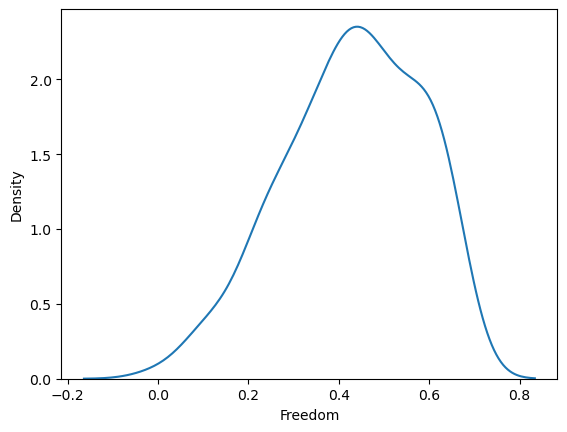

In [57]:
sns.kdeplot(data=happiness.Freedom)


# Dist Plot

C:\Users\saura\AppData\Local\Temp\ipykernel_19412\2188693097.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(happiness['Generosity'])


<Axes: xlabel='Generosity', ylabel='Density'>

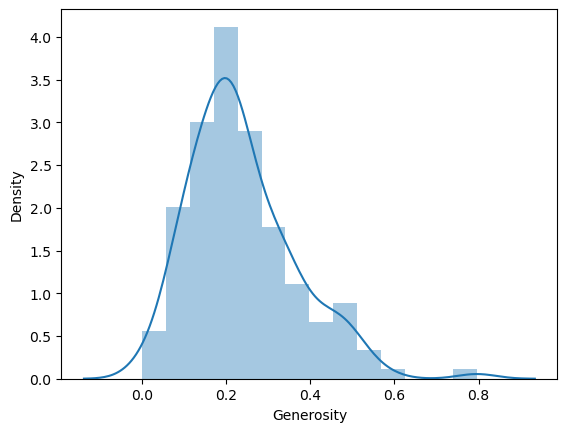

In [46]:
sns.distplot(happiness['Generosity'])


C:\Users\saura\AppData\Local\Temp\ipykernel_19412\1161354194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(happiness['Standard Error'])


<Axes: xlabel='Standard Error', ylabel='Density'>

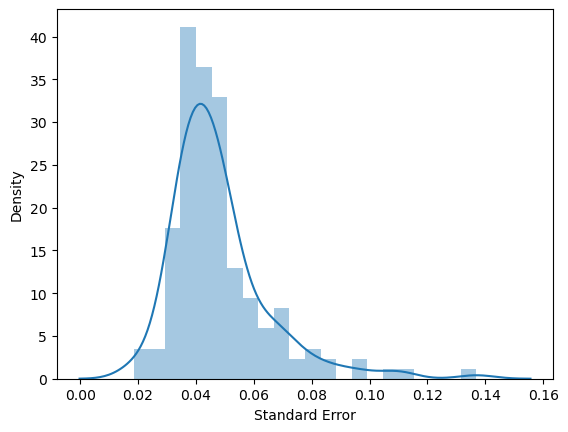

In [60]:
sns.distplot(happiness['Standard Error'])

# Box Plot

Happiness Rank                      Axes(0.125,0.747241;0.133621x0.132759)
Happiness Score                  Axes(0.285345,0.747241;0.133621x0.132759)
Standard Error                    Axes(0.44569,0.747241;0.133621x0.132759)
Economy (GDP per Capita)         Axes(0.606034,0.747241;0.133621x0.132759)
Family                           Axes(0.766379,0.747241;0.133621x0.132759)
Health (Life Expectancy)            Axes(0.125,0.587931;0.133621x0.132759)
Freedom                          Axes(0.285345,0.587931;0.133621x0.132759)
Trust (Government Corruption)     Axes(0.44569,0.587931;0.133621x0.132759)
Generosity                       Axes(0.606034,0.587931;0.133621x0.132759)
Dystopia Residual                Axes(0.766379,0.587931;0.133621x0.132759)
dtype: object

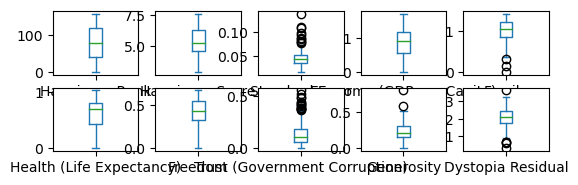

In [63]:
happiness.plot(kind='box',subplots=True,layout=(5,5))

In [64]:
# finding Skewness
happiness.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [75]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(happiness))
z

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.713905,1.947945,0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,1.691535,1.924469,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,1.669166,1.893769,0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,1.646796,1.889255,0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,1.624427,1.803478,0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...,...,...
150,1.641542,1.602327,0.369294,1.026255,0.945943,1.985941,0.274090,0.343483,0.249803,1.343100
151,1.663911,1.663725,0.214450,1.562163,0.624365,1.498813,0.216276,0.106943,0.117411,1.252030
152,1.686281,1.674560,1.100427,1.402596,2.811354,1.367851,1.285662,0.382420,1.118051,0.322135
154,1.731020,1.886746,0.691734,1.488379,2.608163,1.303594,0.379439,0.533653,0.409226,0.930702


In [68]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [69]:
happiness_new=happiness[(z<3).all(axis=1)]

In [70]:
happiness.shape

(158, 10)

In [72]:
happiness_new.shape

(149, 10)

In [73]:
happiness=happiness_new
happiness.shape

(149, 10)

# Hist plot

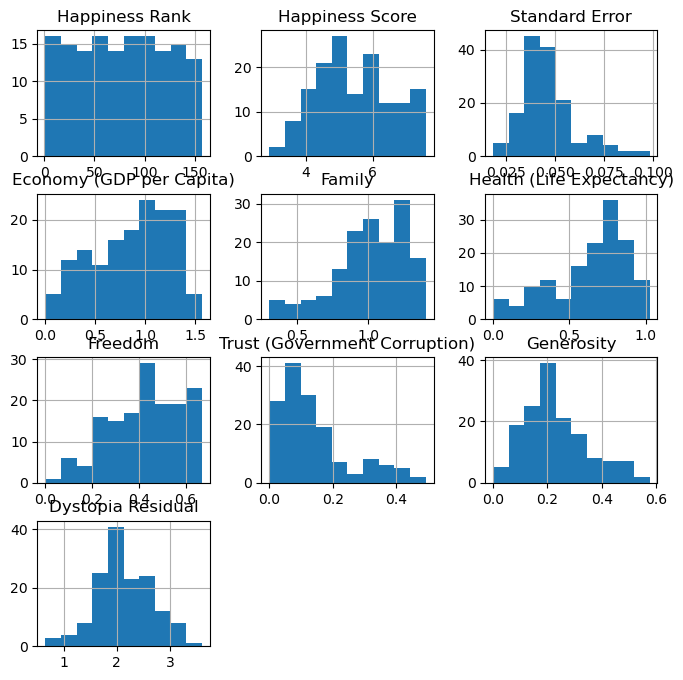

In [74]:
happiness.hist(figsize=(8,8),bins=10)
plt.show()

# Pair plot

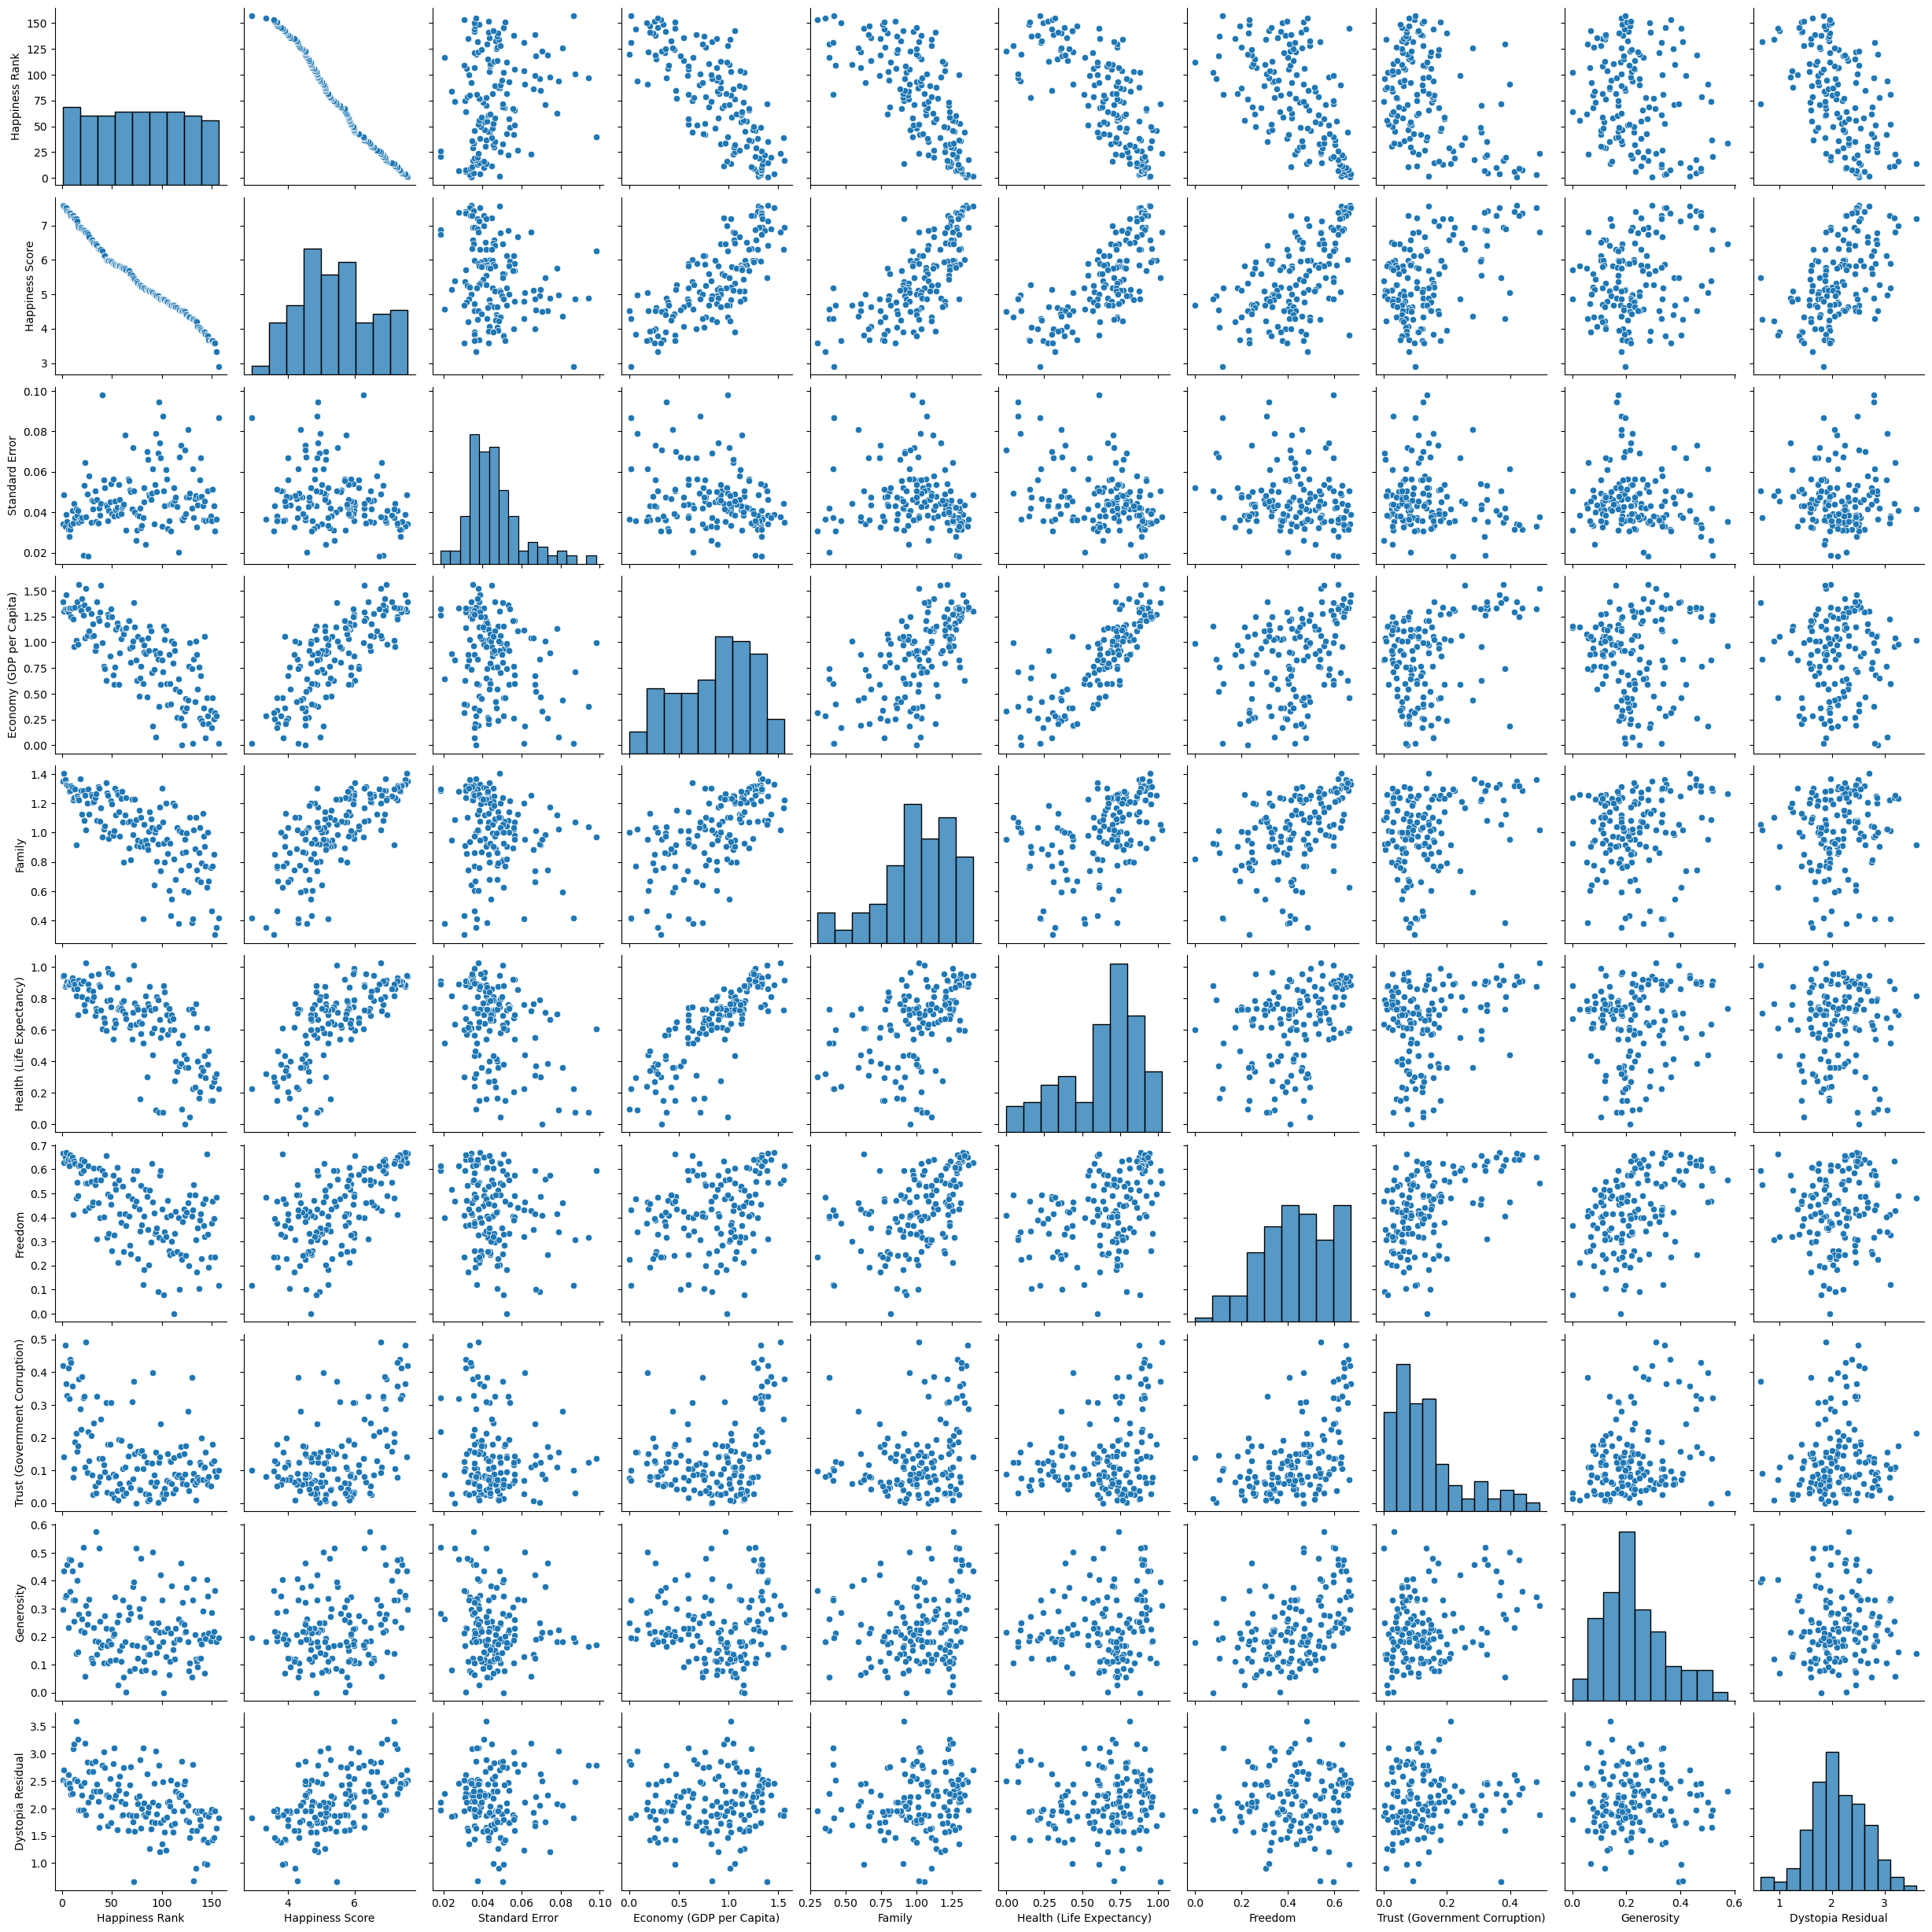

In [76]:
sns.pairplot(happiness)

# Scatter Plot

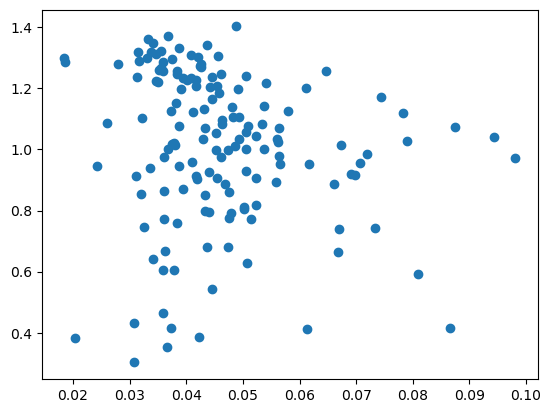

In [77]:
plt.scatter(happiness['Standard Error'],happiness['Family'])
plt.show()

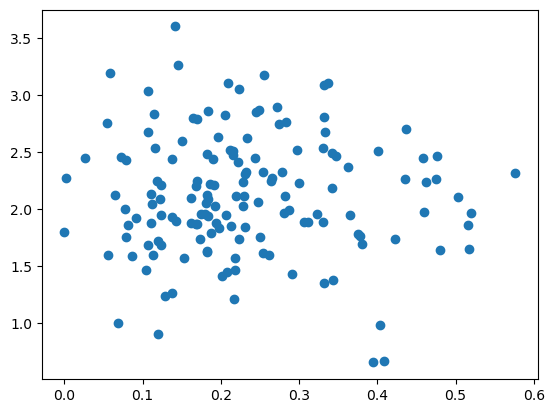

In [79]:
plt.scatter(happiness['Generosity'],happiness['Dystopia Residual'])
plt.show()

# Pair Plot

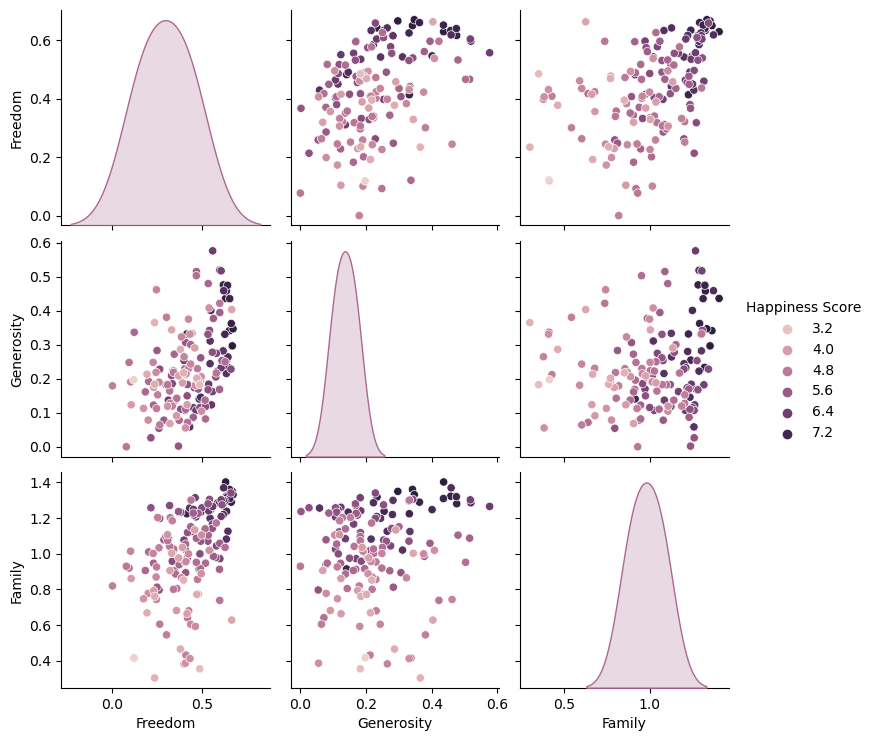

In [86]:
sns.pairplot(data=happiness,hue='Happiness Score',vars=['Freedom','Generosity','Family'])

# Splitting tha Data

In [87]:
x=happiness.drop('Happiness Score',axis=1)
y=happiness['Happiness Score']

In [88]:
print(x)

     Happiness Rank  Standard Error  Economy (GDP per Capita)   Family  \
0                 1         0.03411                   1.39651  1.34951   
1                 2         0.04884                   1.30232  1.40223   
2                 3         0.03328                   1.32548  1.36058   
3                 4         0.03880                   1.45900  1.33095   
4                 5         0.03553                   1.32629  1.32261   
..              ...             ...                       ...      ...   
150             151         0.05141                   0.46534  0.77115   
151             152         0.04324                   0.25812  0.85188   
152             153         0.03084                   0.31982  0.30285   
154             155         0.03656                   0.28665  0.35386   
156             157         0.08658                   0.01530  0.41587   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557

In [89]:
print(y)

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64


# Training tha Data

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [91]:
x_train.shape

(104, 9)

In [92]:
y_train.shape

(104,)

In [93]:
x_test.shape

(45, 9)

In [94]:
y_train.shape

(104,)

In [95]:
lm=LinearRegression()

In [96]:
lm.fit(x_train,y_train)

LinearRegression()

In [97]:
lm.coef_

array([-7.19904598e-06, -9.21174277e-04,  9.99848098e-01,  9.99610761e-01,
        9.99446197e-01,  9.99450328e-01,  9.99862024e-01,  9.99656426e-01,
        9.99675755e-01])

In [98]:
lm.intercept_

0.002482235804538213

In [99]:
lm.score(x_train,y_train)

0.9999999369350528

In [100]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [5.28634018 6.93729484 4.51225389 5.19234657 5.21203881 6.47670266
 5.60464496 3.78082484 5.47389713 5.12417602 4.64232874 7.19970899
 6.29813317 7.28391286 6.90135534 5.81254317 3.90379349 5.42862606
 5.82409264 4.03306834 6.50502063 4.33216877 6.66959049 4.25199001
 4.21846222 3.65518173 4.63345142 4.78790065 5.97525194 6.48511054
 6.81011453 6.98249366 5.58858521 7.2255406  5.99510444 4.69398686
 5.85524685 6.57504242 7.42678993 6.454596   4.41924708 5.09759165
 5.07331178 6.94622081 7.27751868]
actual price: 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
22     6.810
15     6.983
68     5.589
11     7.226
44     5.995
108

In [106]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.0002472394737480954
Mean squared error: 8.213586453015204e-08
Root mean squared error: 0.00028659355284121803


In [107]:
#change coming in y whenever x is being changed
print(r2_score(y_test,pred))

0.9999999311830483


# Testing The Data

In [111]:
#testing the data
i=np.array([158,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726])
i.shape

(9,)

In [112]:
i=i.reshape(1,-1)
i.shape

(1, 9)

In [113]:
lm.predict(i)

C:\Users\saura\New folder\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.83922846])

In [115]:
happiness_score=pd.DataFrame(pred)

In [116]:
happiness_score

,0
0,5.286340
1,6.937295
2,4.512254
3,5.192347
4,5.212039
5,6.476703
6,5.604645
7,3.780825
8,5.473897
9,5.124176
